# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loding Dataset

In [2]:
moviedata = pd.read_csv(r'D:\Data analysis projects\Pandas\Movie data analysis\IMDB-Movie-Data.csv')
moviedata

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# EDA and data cleaning

In [3]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
# you can see revenew and Metascore have null values
moviedata.isnull().sum()/10      # giving the percentage of data missinf

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [5]:
# droping the rowa containing missing values 
moviedata.dropna(axis = 0,inplace = True)
moviedata.shape

(838, 12)

In [6]:
moviedata.duplicated().any()

# no duplicated value

False

In [7]:
moviedata.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


# Data analysis and visulization

## does rating effect revenew

<AxesSubplot: xlabel='Rating', ylabel='Revenue (Millions)'>

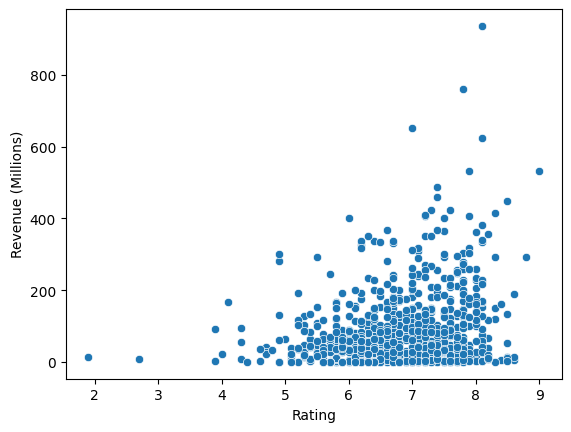

In [8]:
sns.scatterplot(x = 'Rating',y = 'Revenue (Millions)',data = moviedata)

# yes it effects , directly proportional 

## does runtime effect Revenue ?

<AxesSubplot: xlabel='Runtime (Minutes)', ylabel='Revenue (Millions)'>

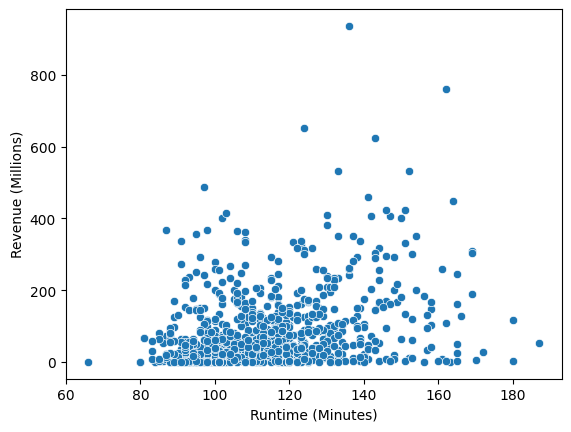

In [9]:
sns.scatterplot(x ='Runtime (Minutes)',y = 'Revenue (Millions)',data = moviedata)

## Avegare rating for each director

In [10]:
director_rating = moviedata.groupby('Director').mean().sort_values(ascending=False ,by = 'Rating')
director_rating
# moviedata[moviedata['Director']=='Aamir Khan']

C:\Users\Parn\AppData\Local\Temp\ipykernel_9816\1717875235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director_rating = moviedata.groupby('Director').mean().sort_values(ascending=False ,by = 'Rating')


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Director,,,,,,,
Christopher Nolan,72.6,2010.0,152.6,8.68,1311817.0,303.018,74.8
Olivier Nakache,250.0,2011.0,112.0,8.60,557965.0,13.180,57.0
Makoto Shinkai,97.0,2016.0,106.0,8.60,34110.0,4.680,79.0
Florian Henckel von Donnersmarck,477.0,2006.0,137.0,8.50,278103.0,11.280,89.0
Aamir Khan,992.0,2007.0,165.0,8.50,102697.0,1.200,42.0
...,...,...,...,...,...,...,...
Sam Taylor-Johnson,64.0,2015.0,125.0,4.10,244474.0,166.150,46.0
Joey Curtis,617.0,2016.0,101.0,4.00,277.0,20.760,53.0
George Nolfi,526.0,2016.0,103.0,3.90,552.0,93.050,61.0


## year having highest average voting and revineue

C:\Users\Parn\AppData\Local\Temp\ipykernel_9816\1567971286.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_voting = moviedata.groupby('Year').mean()


<AxesSubplot: xlabel='Year', ylabel='Votes'>

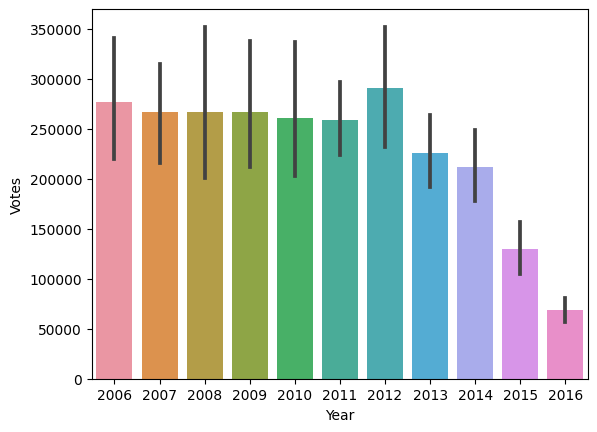

In [11]:
year_voting = moviedata.groupby('Year').mean()
year_voting[['Revenue (Millions)','Votes']]
sns.barplot(x = 'Year',y = 'Votes',data = moviedata)


## movies per year

<AxesSubplot: xlabel='Year', ylabel='count'>

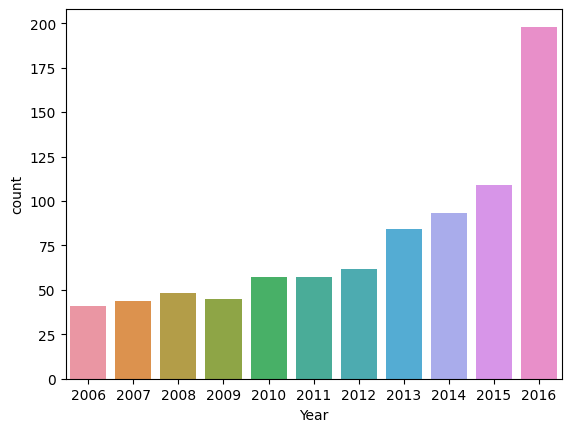

In [12]:
sns.countplot(x = 'Year',data = moviedata)


## Top 10 lenthiest movie and runtime 

In [13]:
moviedata.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


## most popular movie title

In [14]:
moviedata[moviedata['Revenue (Millions)'] == moviedata['Revenue (Millions)'].max()]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

## top 10 highest rated directors

In [27]:
top10rated_director = moviedata.nlargest(10,'Rating')[['Title','Director','Rating']]
top10rated_director

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
64,The Prestige,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
124,The Dark Knight Rises,Christopher Nolan,8.5
133,Whiplash,Damien Chazelle,8.5
476,The Lives of Others,Florian Henckel von Donnersmarck,8.5


<AxesSubplot: xlabel='Rating', ylabel='Title'>

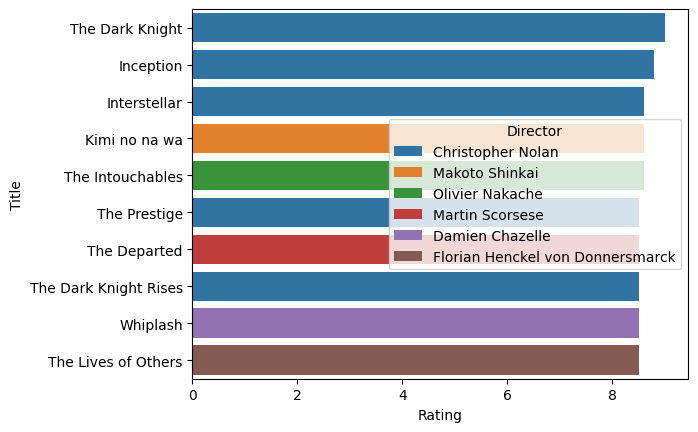

In [25]:
sns.barplot(x = 'Rating',y = 'Title',hue = 'Director',data = top10rated_director,dodge = False)

<AxesSubplot: xlabel='Genre', ylabel='count'>

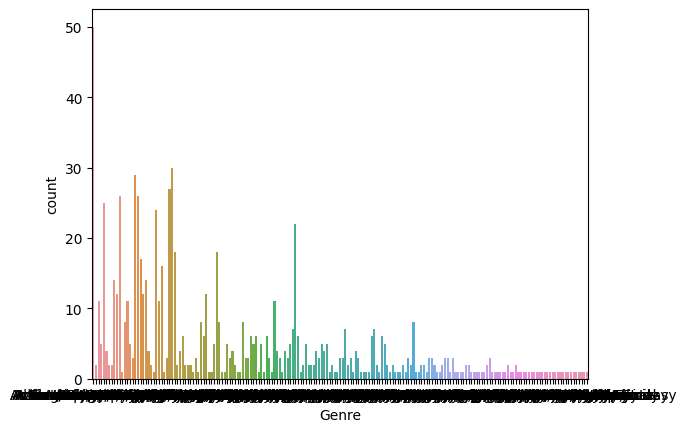

In [17]:
# plt.
sns.countplot(x = 'Genre',data = moviedata)

In [18]:
moviedata['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

<AxesSubplot: xlabel='Genre', ylabel='count'>

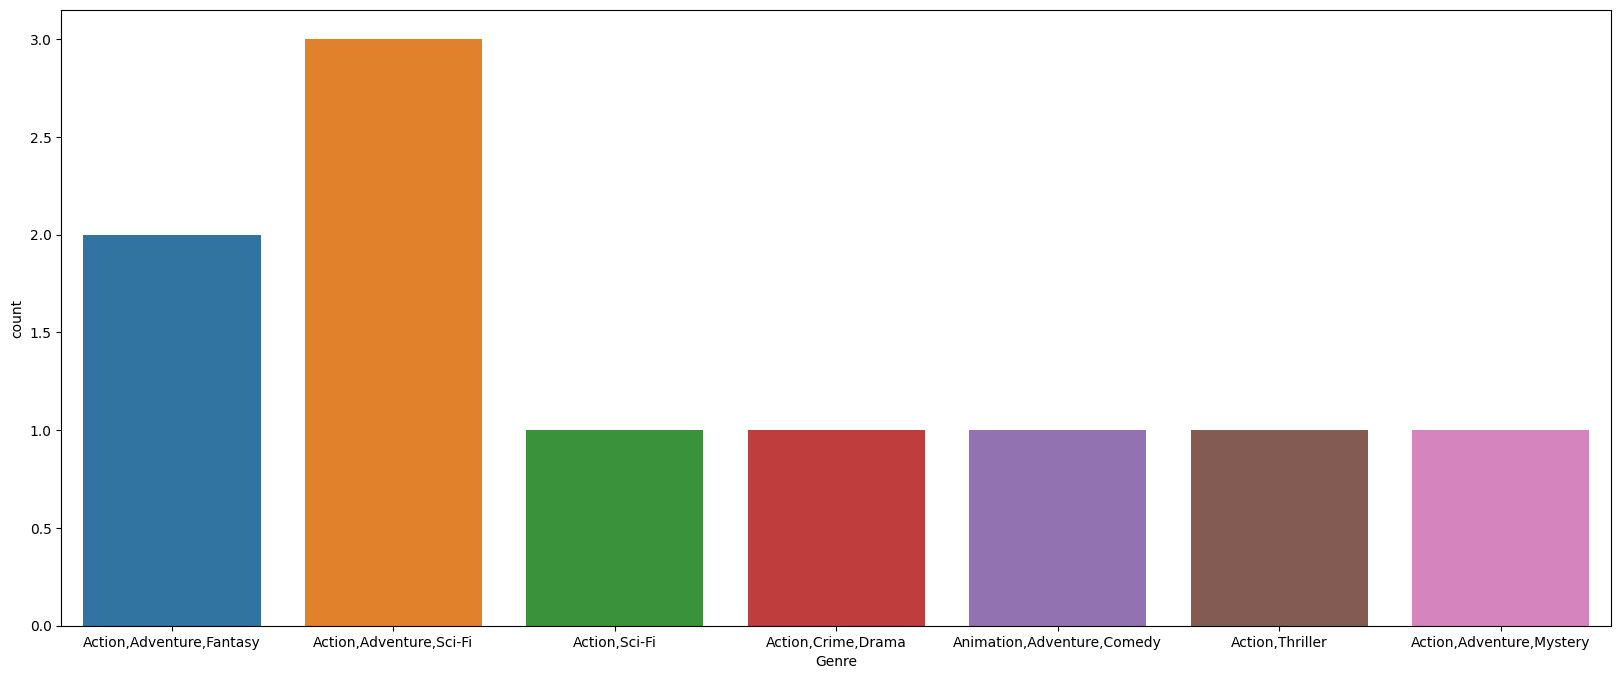

In [19]:
plt.figure(figsize = (20,8))
top_revinews = moviedata.nlargest(10,'Revenue (Millions)')
top_revinews
sns.countplot(x = 'Genre', data = top_revinews)


In [20]:
top_revinews['Genre'].value_counts()

Action,Adventure,Sci-Fi       3
Action,Adventure,Fantasy      2
Action,Sci-Fi                 1
Action,Crime,Drama            1
Animation,Adventure,Comedy    1
Action,Thriller               1
Action,Adventure,Mystery      1
Name: Genre, dtype: int64

Conclusion 
Action, Adventure and Sci-Fi have high revenew


does rating have any effect on revenew 

In [21]:
sample = moviedata.head()

yes rating is effecting the revenew 

In [22]:
d = {'name':['A','B','C','A'],
    'number':[1,2,3,4],
    'aasai':['a','b','f','g']}
sample2 = pd.DataFrame(d)
sample2.groupby('name').mean()

C:\Users\Parn\AppData\Local\Temp\ipykernel_9816\1296623103.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sample2.groupby('name').mean()


,number
name,
A,2.5
B,2.0
C,3.0
